In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader
from datetime import date # Date & time functionality
%matplotlib inline

In [2]:
start = date(1995,1,1)
end = date(2018,1,12)
ticker = '^GSPC'
data_source = 'yahoo'
stock_data_SP500 = DataReader(ticker, data_source, start, end)

In [3]:
start = date(1995,1,1)
end = date(2018,1,12)
ticker = 'DIS'
data_source = 'yahoo'
stock_data_WDC = DataReader(ticker, data_source, start, end)

In [4]:
stock_data_SP500.head()
stock_data_WDC.head()

In [5]:
plt.style.use('seaborn')
stock_data_SP500['Close'].plot(title='SP500')
stock_data_WDC['Close'].plot(title='Disney')

In [6]:
plt.style.use('seaborn')
stock_data_WDC['Close'].plot(title='Disney and S&P500')
plt.legend(['Disney'])
stock_data_SP500['Close'].plot(secondary_y='Close')
plt.legend(['S&P500'], loc='upper left')
#JOIN

In [58]:
tp_ms = pd.read_excel(open('theme parks market shares.xlsx','rb'), sheetname='market shares')
FL_ms = pd.read_excel(open('theme parks market shares.xlsx','rb'), sheetname='FL market shares')
fs_ms = pd.read_excel(open('film studios market shares.xlsx','rb'), sheetname='market shares')

In [4]:
tp_ms.head()
fs_ms.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Disney,20.3,18.5,15.7,21.0,16.3,12.5,16.7,15.3,11.4,12.1,13.9,12.2,13.9,14.9,14.9,19.8,26.3,21.8
Time Warner,17.2,22.0,21.3,23.0,17.8,21.7,14.9,20.5,19.7,20.2,19.1,17.9,17.9,21.3,18.8,16.9,16.7,18.4
NBC/Universal,14.3,11.8,9.8,12.7,10.9,13.2,10.8,12.7,13.1,10.1,9.0,11.5,13.2,13.3,11.4,22.3,14.1,15.0
Viacom (Paramount),10.7,11.3,7.4,7.2,6.8,9.8,10.8,16.1,17.3,14.5,16.2,19.3,8.2,8.4,9.7,5.9,7.7,4.8
Dreamworks,10.3,4.9,5.2,3.0,10.0,5.7,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


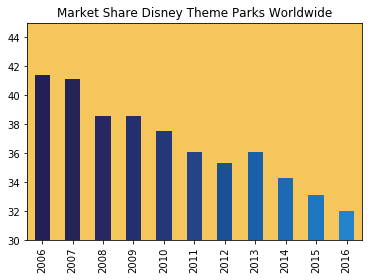

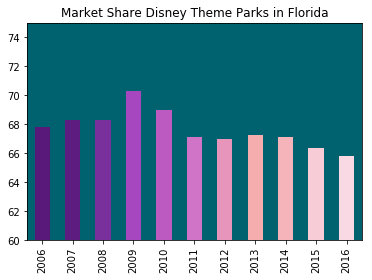

In [135]:
tp_plot = pd.read_excel(open('theme parks market shares.xlsx','rb'), sheetname='plot groups', parse_cols=[0,1])
my_colors = ['#232055', '#242458', '#272861', '#252F6C', '#243877', '#254487', '#1A5096', '#1860AA', '#1C6AB4', '#1E76C0', '#2482CC']
tp_plot.plot(kind='bar', legend=False, color=my_colors, title='Market Share Disney Theme Parks Worldwide')
axes = plt.gca()
axes.set_ylim([30,45])
axes.set_facecolor('#F5C65C')

FL_plot = pd.read_excel(open('theme parks market shares.xlsx','rb'), sheetname='plot FL', parse_cols=[0,1])
my_colors2 = ['#59197A', '#5D1C80', '#79309C', '#A647BF', '#BC5AC1', '#D074C7', '#E795BB', '#F5ADAE', '#F5B4BA', '#F7CCD6', '#F9D9E4']
FL_plot.plot(kind='bar', legend=False, color=my_colors2, title='Market Share Disney Theme Parks in Florida')
axes = plt.gca()
axes.set_ylim([60,75])
axes.set_facecolor('#00626F')

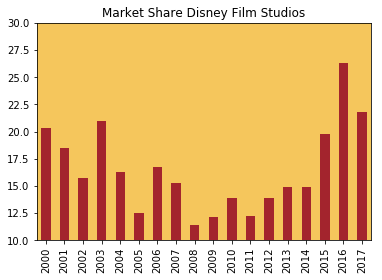

In [98]:
fs_plot = pd.read_excel(open('film studios market shares.xlsx','rb'), sheetname='plot', parse_cols=[0,1])
fs_plot.plot(kind='bar', legend=False, color='#A3242D',title='Market Share Disney Film Studios')
axes = plt.gca()
axes.set_ylim([10,30])
axes.set_facecolor('#F5C65C')

In [54]:
def f(x):
    return x/100
tp_ms_small = tp_ms.apply(f, axis=1)
def g(x):
    return x**2
tp_ms_smallsquared = tp_ms_small.apply(g, axis=1)
tp_ms_hhi = tp_ms_smallsquared.sum(axis=0)
def h(x):
    return 1/x
tp_ms_invhhi = tp_ms_hhi.apply(h)
tp_ms_invhhi.round(decimals=2)

2006    4.63
2007    4.64
2008    5.07
2009    5.06
2010    5.22
2011    5.43
2012    5.48
2013    5.23
2014    5.66
2015    5.98
2016    6.21
dtype: float64

In [55]:
fs_ms_withoutother = fs_ms.drop(fs_ms.index[[7]])
def f(x):
    return x/100
fs_ms_small = fs_ms_withoutother.apply(f, axis=1)
def g(x):
    return x**2
fs_ms_smallsquared = fs_ms_small.apply(g, axis=1)
fs_ms_hhi = fs_ms_smallsquared.sum(axis=0)
def h(x):
    return 1/x
fs_ms_invhhi = fs_ms_hhi.apply(h)
fs_ms_invhhi.round(decimals=2)

2000    7.57
2001    7.37
2002    7.60
2003    6.82
2004    8.31
2005    7.55
2006    7.18
2007    7.18
2008    7.48
2009    7.66
2010    7.73
2011    7.83
2012    8.84
2013    8.78
2014    7.91
2015    6.93
2016    6.78
2017    7.54
dtype: float64

In [60]:
def f(x):
    return x/100
FL_ms_small = FL_ms.apply(f, axis=1)
def g(x):
    return x**2
FL_ms_smallsquared = FL_ms_small.apply(g, axis=1)
FL_ms_hhi = FL_ms_smallsquared.sum(axis=0)
def h(x):
    return 1/x
FL_ms_invhhi = FL_ms_hhi.apply(h)
FL_ms_invhhi.round(decimals=3)

2006    1.953
2007    1.935
2008    1.934
2009    1.857
2010    1.906
2011    1.973
2012    1.979
2013    1.963
2014    1.963
2015    1.986
2016    1.999
dtype: float64

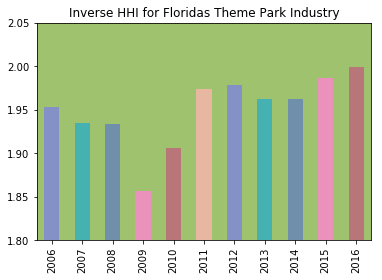

In [145]:
my_colors3 = ['#8491C6', '#45B1B1', '#708FAB', '#EA92BC', '#B87678', '#E7B7A1']
FL_ms_invhhi.plot(kind='bar', color=my_colors3, title='Inverse HHI for Floridas Theme Park Industry')
axes = plt.gca()
axes.set_ylim([1.8,2.05])
axes.set_facecolor('#9FC26E')

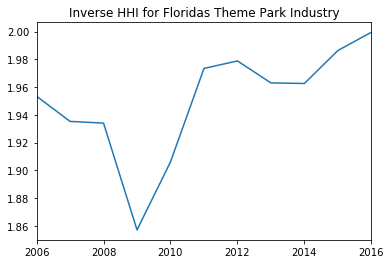

In [136]:
FL_ms_invhhi.plot(title='Inverse HHI for Floridas Theme Park Industry')

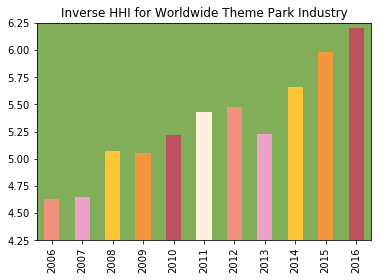

In [149]:
my_colors4 = ['#F1927E', '#ECA1CA', '#FDC638', '#F2973E', '#BC505D', '#FEEEDE']
tp_ms_invhhi.plot(kind='bar', color=my_colors4, title='Inverse HHI for Worldwide Theme Park Industry')
axes = plt.gca()
axes.set_ylim([4.25,6.25])
axes.set_facecolor('#82AE59')

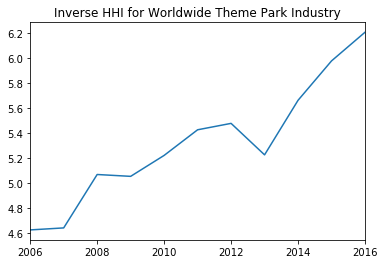

In [86]:
tp_ms_invhhi.plot(title='Inverse HHI for Worldwide Theme Park Industry')

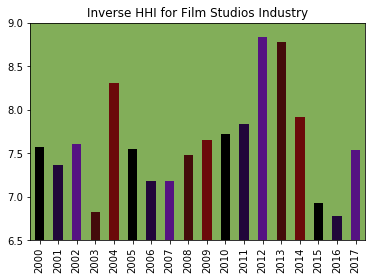

In [155]:
my_color5 = ['#000000', '#21073a', '#551382', '#440b0b', '#6b0a0a']
fs_ms_invhhi.plot(kind='bar', color=my_color5, title='Inverse HHI for Film Studios Industry')
axes = plt.gca()
axes.set_ylim([6.5,9])
axes.set_facecolor('#82AE59')

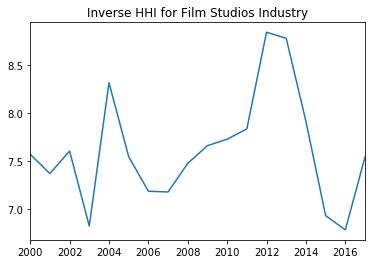

In [88]:
fs_ms_invhhi.plot(title='Inverse HHI for Film Studios Industry')